# Visualización del Modelo de Regresión Logística 2D

Funciones auxiliares (solo ejecutar, y seguir más abajo)

In [1]:
%matplotlib notebook

In [2]:
import rnutil
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

rnutil: Los archivos de los conjuntos de datos que ofrece este paquete también están disponibles en https://github.com/facundoq/redes-neuronales-util/tree/main/rnutil/data para descargar de forma individual
rnutil: Agregando el parámetro local=True en las funciones rnutil.load_dataset_numpy, rnutil.load_dataset_pandas y rnutil.load_image se puede cargar una versión local de un archivo en lugar de la versión que ofrece este paquete.


In [3]:
def sigmoid(x): return 1/(1+np.exp(-x))

def linear(x,w,b): return x.dot(w)+b

def forward(x,w,b): return sigmoid(linear(x,w,b))

def mean_binary_cross_entropy(y,yhat):
    eps = np.finfo(float).eps
    n=len(y)
    errors=np.zeros(n)
    for i in range(n):
        if y[i]==1:
            errors[i]=-np.log(yhat[i]+eps)
        else: #y[i]==0
            errors[i]=-np.log(1-yhat[i]+eps)
            
    # implementación vectorial
    #errors=y* (-log(yhat)) +(1-y)* (-log(-yhat))
    return errors.mean()

# Visualización del modelo y la superficie del error

El siguiente código carga un conjunto de datos, y luego crea un modelo de regresión logística para predecir los valores de salida `y` en base a los de entrada `x` y en base a la función `y=sigmoid(w*x+b)`.

Probá modificando los parámetros `w` y `b` del modelo, tratando de minimizar *a mano* el error. Observá como cambia la recta `w*x+b` y por consecuente la frontera entre clases dada por `sigmoid(w*x+b)` y qué tan bien se ajusta a los datos.  

En este caso, ya no podemos visualizar la función de error ya que hay 3 parámetros y por ende necesitaríamos 4 dimensiones (3 para los parámetros y una para el valor del error en base a ellos).

Nota: Ahora tanto `w` como `x` ahora son vectores con 2 dimensiones, o sea `x` tiene tamaño `Nx2` y `w` tiene tamaño `2`.
    



In [ ]:
## Carga de datos
data=rnutil.load_dataset_numpy("study_logistic_2d.csv")
x,y=data[:,0:2],data[:,2]

<IPython.core.display.Javascript object>


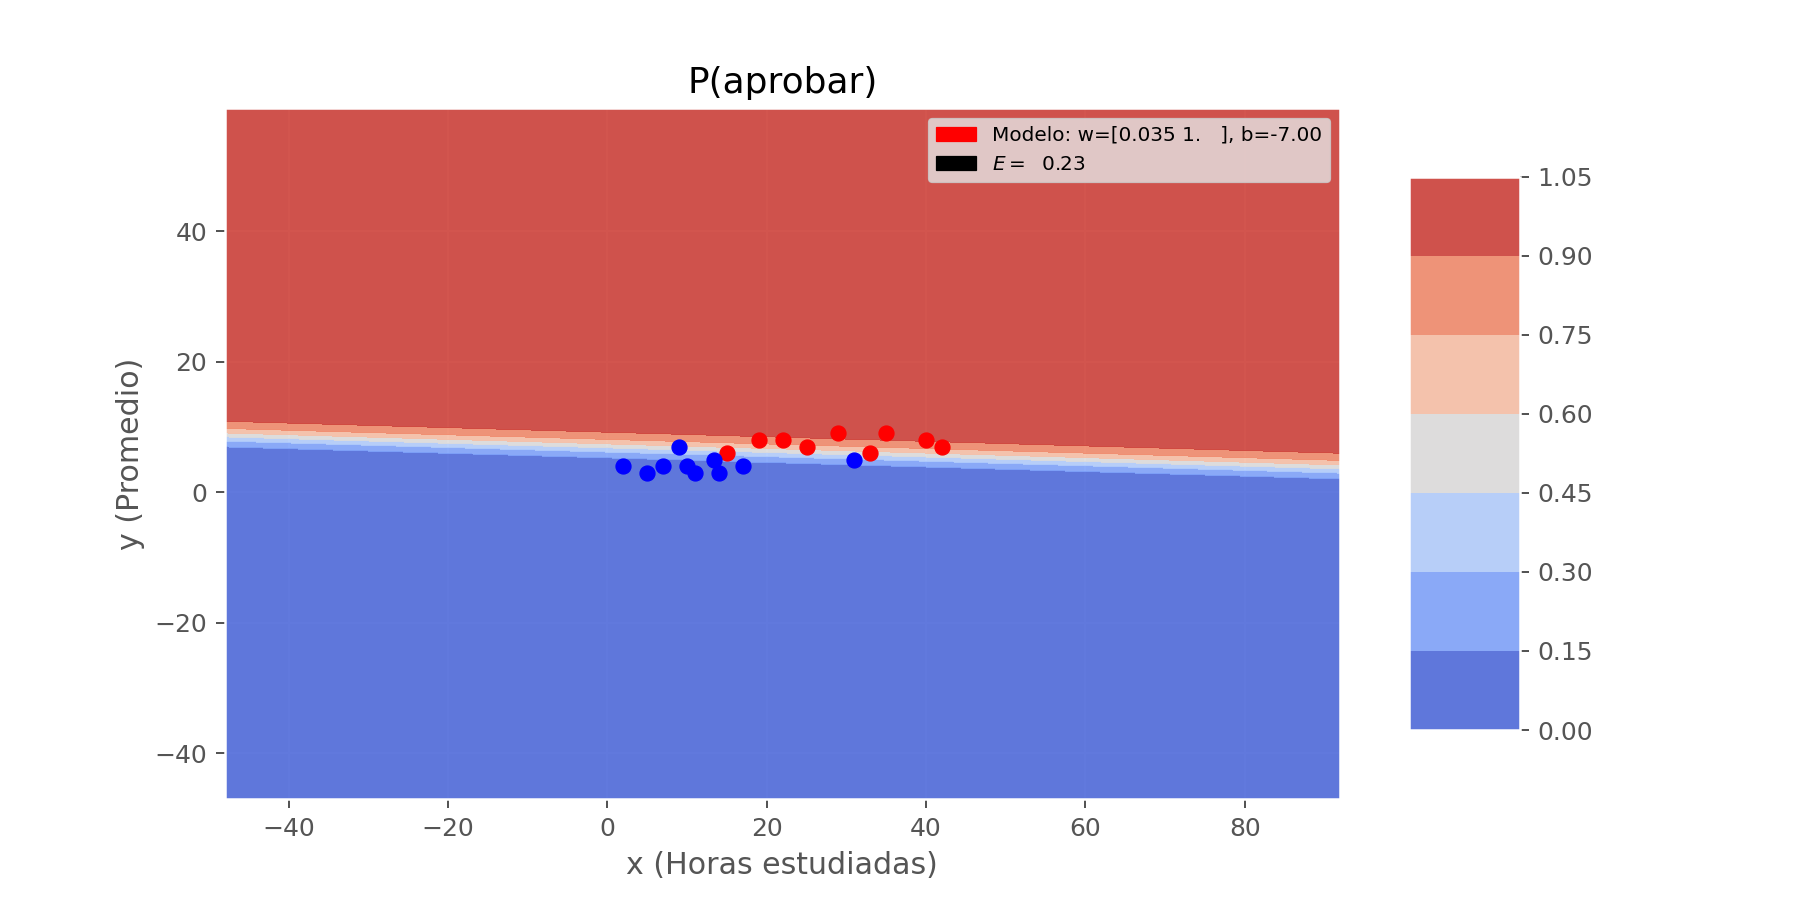

In [46]:
## Parámetros del modelo (probar valores entre -5 y 5)
w=np.array([0.035,1])
b=-7

yhat=forward(x,w,b)
error = mean_binary_cross_entropy(y,yhat)

rnutil.plot_regresion_logistica2D(w,b,x,y,error,"x (Horas estudiadas)","y (Promedio)","P(aprobar)",padding=50)